# Competición Churn 2

### Limpieza

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
pd.set_option('max_columns', None)
import numpy as np 

import seaborn as sns
import pylab as plt
%matplotlib inline

In [2]:
# Importamos los datos de test y train

df_1 = pd.read_csv(r'C:\Users\mario\OneDrive\Escritorio\my_bootcamp\data\train.csv')
df_2 = pd.read_csv(r'C:\Users\mario\OneDrive\Escritorio\my_bootcamp\data\test.csv')

In [3]:
# Hacemos una copia de los DataFrames para no alterar el original

df_train = df_1.copy()
df_test = df_2.copy()

df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,id
0,7242-QZLXF,Male,0,No,Yes,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.30,25.3,1,0
1,8325-QRPZR,Female,0,No,No,7,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,75.15,525,0,1
2,7874-ECPQJ,Female,0,No,Yes,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.05,85.5,0,2
3,2476-YGEFM,Female,0,No,No,29,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),76.00,2215.25,0,3
4,2276-YDAVZ,Female,0,No,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.10,270.7,1,4


In [4]:
# Eliminamos las coluimnas id y customerID

df_train = df_train.drop(['customerID', 'id'], axis = 1)

In [5]:
# Convertimos la variable TotalCharges a numérica y rellenamos los elementos vacíos

df_train.TotalCharges = df_train.TotalCharges.replace([' '], [np.nan])

df_train.TotalCharges = pd.to_numeric(df_train.TotalCharges)

df_train = df_train.fillna(df_train.TotalCharges.median())

In [6]:
# Separamos las columnas categóricas de las numéricas

df_train_numeric = df_train._get_numeric_data()
df_train_categorical = df_train.drop(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], axis = 1)

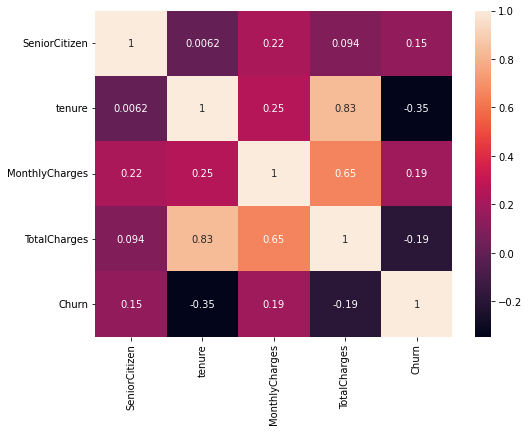

In [7]:
# Vemos la correlación entre las variables numéricas

corr_df=df_train_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [8]:
# Eliminamos la variable Total Charges (está muy correlacionada con MonthlyCharges y con tenure)

df_train_numeric = df_train_numeric.drop(['TotalCharges', 'Churn'], axis = 1)

df_train_numeric.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,25.30
1,0,7,75.15
2,0,4,20.05
3,0,29,76.00
4,0,3,75.10


In [9]:
# Vemos las variables de cada columna y las contamos

for c in df_train_categorical.columns:
    print(df_train_categorical['{}'.format(c)].value_counts(), '\n -------------------------------')
    
# Hay varias variables categóricas que las podemos pasar a 0 y 1    

Male      2713
Female    2569
Name: gender, dtype: int64 
 -------------------------------
No     2723
Yes    2559
Name: Partner, dtype: int64 
 -------------------------------
No     3696
Yes    1586
Name: Dependents, dtype: int64 
 -------------------------------
Yes    4773
No      509
Name: PhoneService, dtype: int64 
 -------------------------------
No                  2512
Yes                 2261
No phone service     509
Name: MultipleLines, dtype: int64 
 -------------------------------
Fiber optic    2313
DSL            1821
No             1148
Name: InternetService, dtype: int64 
 -------------------------------
No                     2625
Yes                    1509
No internet service    1148
Name: OnlineSecurity, dtype: int64 
 -------------------------------
No                     2290
Yes                    1844
No internet service    1148
Name: OnlineBackup, dtype: int64 
 -------------------------------
No                     2339
Yes                    1795
No interne

In [10]:
# Las categorías importantes son : Partner, InternetService, Contract, PaymentMethod las pasamos a numéricas

df_train_categorical.Partner = df_train_categorical.Partner.apply(lambda x: 1 if x == 'Yes' else 0)

df_train_categorical[['DSL', 'Fiber optic', 'No']] = pd.get_dummies(df_train_categorical.InternetService)

df_train_categorical[['Month-to-month', 'Two year', 'One year']] = pd.get_dummies(df_train_categorical.Contract)

df_train_categorical[['Electronic check', 
                  'Bank transfer (automatic)',
                  'Credit card (automatic)', 
                  'Mailed check']] = pd.get_dummies(df_train_categorical.PaymentMethod)

In [11]:
# Nos quedamos solo con las cvariables que hemos convertido a numéricas

df_train_categorical = df_train_categorical._get_numeric_data()

df_train_categorical.head()

,Partner,DSL,Fiber optic,No,Month-to-month,Two year,One year,Electronic check,Bank transfer (automatic),Credit card (automatic),Mailed check
0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,1,0,1,0,0,0,0,1,0
2,0,0,0,1,1,0,0,1,0,0,0
3,0,0,1,0,1,0,0,0,1,0,0
4,0,0,1,0,1,0,0,0,1,0,0


In [12]:
# Creamos una fucnión en la que para dejar el DataSet de la manera que nos interesa

def clean(df):
    
    df_train_numeric = df._get_numeric_data()
    
    df_train_categorical = df.drop(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1)
    
    df_train_categorical.Partner = df_train_categorical.Partner.apply(lambda x: 1 if x == 'Yes' else 0)

    df_train_categorical[['DSL', 'Fiber optic', 'No']] = pd.get_dummies(df_train_categorical.InternetService)

    df_train_categorical[['Month-to-month', 'Two year', 'One year']] = pd.get_dummies(df_train_categorical.Contract)

    df_train_categorical[['Electronic check', 
                          'Bank transfer (automatic)',
                          'Credit card (automatic)', 
                          'Mailed check']] = pd.get_dummies(df_train_categorical.PaymentMethod)
    
    df_train_categorical = df_train_categorical._get_numeric_data()
    
    X = pd.concat([df_train_numeric, df_train_categorical], axis=1).drop('id', axis = 1)
    
    return X

In [13]:
# Aplicamos la función
clean(df_1).head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,Partner,Churn,DSL,Fiber optic,No,Month-to-month,Two year,One year,Electronic check,Bank transfer (automatic),Credit card (automatic),Mailed check
0,0,1,25.30,1,0,1,1,0,0,1,0,0,0,0,1,0
1,0,7,75.15,0,0,0,0,1,0,1,0,0,0,0,1,0
2,0,4,20.05,0,0,0,0,0,1,1,0,0,1,0,0,0
3,0,29,76.00,0,0,0,0,1,0,1,0,0,0,1,0,0
4,0,3,75.10,1,0,1,0,1,0,1,0,0,0,1,0,0


### Modelado

In [14]:
X = clean(df_1).drop('Churn', axis = 1)
y = df_1.Churn

In [15]:
from sklearn.model_selection import train_test_split as tts

In [16]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4225, 14), (4225,), (1057, 14), (1057,))

In [17]:
# modelos

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from xgboost import XGBClassifier as XGBC
from lightgbm import LGBMClassifier as LGBMC
from catboost import CatBoostClassifier as CTC

from sklearn.metrics import f1_score

In [18]:
# Entrenamos diferentes modelos y vemos cuál es el mejor

def fitter(modelo):
    
    modelo.fit(X_train, y_train)
    
    y_pred=modelo.predict(X_test)
    
    score=f1_score(y_test, y_pred)
    
    print('F1:', score, modelo)
    
    return modelo

In [19]:
modelos = [RFC(), GBC(), XGBC(), LGBMC(), CTC(verbose = 0)]

for model in modelos:
    fitter(model)
    
# El mejor modelo que nos sale es GBC()

F1: 0.5364891518737672 RandomForestClassifier()
F1: 0.5674044265593561 GradientBoostingClassifier()
[20:11:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1: 0.5275590551181103 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
   

### Búsqueda de hiperparámetros

In [20]:
# Hacemos gridsearching

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # random mas rapido

In [21]:
params={'loss': ['deviance', 'exponential'],
        'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
        'n_estimators': [50, 100, 150, 500]}

In [22]:
grid=GridSearchCV(GBC(), params, cv=2)

grid.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [50, 100, 150, 500]})

In [23]:
grid.best_params_

{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 500}

In [24]:
modelo=fitter(grid.best_estimator_) # Mejor modelo

F1: 0.5824847250509165 GradientBoostingClassifier(learning_rate=0.01, loss='exponential',
                           n_estimators=500)


In [25]:
# Entrenamos el modelo con todos los datos

modelo=modelo.fit(X, y)

### Trasformamos el dataset de test

In [26]:
df_test = clean(df_2)

df_test.head()

,SeniorCitizen,tenure,MonthlyCharges,Partner,DSL,Fiber optic,No,Month-to-month,Two year,One year,Electronic check,Bank transfer (automatic),Credit card (automatic),Mailed check
0,0,1,24.80,1,1,0,0,1,0,0,0,0,1,0
1,0,41,25.25,0,0,0,1,1,0,0,1,0,0,0
2,0,52,19.35,1,0,0,1,0,0,1,0,0,0,1
3,0,1,76.35,0,0,1,0,1,0,0,0,0,1,0
4,0,67,50.55,0,1,0,0,0,0,1,1,0,0,0


In [27]:
# Predicción 

y_pred=modelo.predict(df_test)

y_pred[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
df_pred = pd.DataFrame({'id': df_2.id,
                        'churn':y_pred})

In [29]:
df_pred.head()

,id,churn
0,0,1
1,1,0
2,2,0
3,3,1
4,4,0


In [30]:
df_pred.to_csv(r'C:\Users\mario\OneDrive\Escritorio\my_bootcamp\Machine Learning\Ejercicios\Churn_predicted\churn_pred.csv', index = False)